NYC-TAXI-EDA-FEATURE-ENGINEERING<br>
https://www.kaggle.com/frednavruzov/nyc-taxi-eda-feature-engineering

In [1]:
import pandas as pd
import numpy as np
import sympy
import datetime as dt
import time
from math import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ipyleaflet import *
import folium
import json
import geopy.distance
from haversine import haversine
from tqdm import tqdm_notebook

sns.set()
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [2]:
train = pd.read_csv("../dataset/train.csv") # 각자 데이터셋의 폴더

### data에 대한 기본적인 탐색

- traing data의 row 수와 column 수

In [3]:
print("traing data의 row 수 : {}, column 수 : {}".format(train.shape[0], train.shape[1]))

traing data의 row 수 : 1458644, column 수 : 11


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.describe().round(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [6]:
# taxi['count'] = 1

# 전처리

- 아웃라이어 제거
1. 시간
    - pickup_datetime
2. 위치
3. 승객수

### 아웃라이어 제거
- 시간
- 승객수
- 위치

In [7]:
# 운행 시간 0, 2시간 벗어나는 데이터 제거

# taxi = taxi[taxi["trip_duration"] >= 0]
# taxi = taxi[taxi["trip_duration"] <= 60*60*2]

In [8]:
# 승객 수 0명 제거

# taxi = taxi[taxi["passenger_count"] != 0]

## pickup_datetime 살피기

In [9]:
# pd.to_datetime을 해줘야 pickup_datetime coulmn의 data type이 datetime으로 됨
pickup_datetime_dt = pd.to_datetime(train["pickup_datetime"])
dropoff_datetime_dt = pd.to_datetime(train["dropoff_datetime"])

In [10]:
# trip_duration, count를 포함하고, pickup_datetime의 data로만 이루어진 dataframe(taxi_df1)을 만든다.
# taxi_df1 = taxi.loc[:, ["passenger_count","trip_duration", "count"]]
# taxi_df1["pickup_datetime"] = pickup_datetime_dt

In [11]:
train["pickup_datetime"] = pickup_datetime_dt
train["dropoff_datetime"] = dropoff_datetime_dt

train["pickup_date"] = train["pickup_datetime"].dt.date
train["dropoff_date"] = train["dropoff_datetime"].dt.date

train["pickup_month"] = train["pickup_datetime"].dt.month
train["dropoff_month"] = train["dropoff_datetime"].dt.month

train["pickup_weekday"] = train["pickup_datetime"].dt.weekday
train["dropoff_weekday"] = train["dropoff_datetime"].dt.weekday

train["pickup_hour"] = train["pickup_datetime"].dt.hour
train["dropoff_hour"] = train["dropoff_datetime"].dt.hour

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_date           1458644 non-null object
dropoff_date          1458644 non-null object
pickup_month          1458644 non-null int64
dropoff_month         1458644 non-null int64
pickup_weekday        1458644 non-null int64
dropoff_weekday       1458644 non-null int64
pickup_hour           1458644 non-null int64
dropoff_hour          1458644 non-null int64
dt

In [55]:
train.describe().round(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49,3.52,3.52,3.05,3.05,13.61,13.60
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43,1.68,1.68,1.95,1.96,6.40,6.48
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00,2.00,2.00,1.00,1.00,9.00,9.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00,4.00,4.00,3.00,3.00,14.00,14.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00,5.00,5.00,5.00,5.00,19.00,19.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00,6.00,7.00,6.00,6.00,23.00,23.00


### EDA of pickup_datetime in train data
- year : 2016년 
- month : 1~7월
- hour : 0~23시
- weekday : 월요일~일요일

In [14]:
# # year
# print("데이터가 기록된 연도")
# print("가장 오래된 데이터의 기록 연도: {}년".format(taxi_df1["pickup_datetime"].dt.year.min()))
# print("가장 최신 데이터의 기록 연도: {}년".format(taxi_df1["pickup_datetime"].dt.year.max()))
# print('')

# # month
# print("데이터가 기록된 달")
# print("가장 오래된 데이터의 기록된 달: {}월".format(taxi_df1["pickup_month"].min()))
# print("가장 최신 데이터가 기록된 달: {}월".format(taxi_df1["pickup_month"].max()))

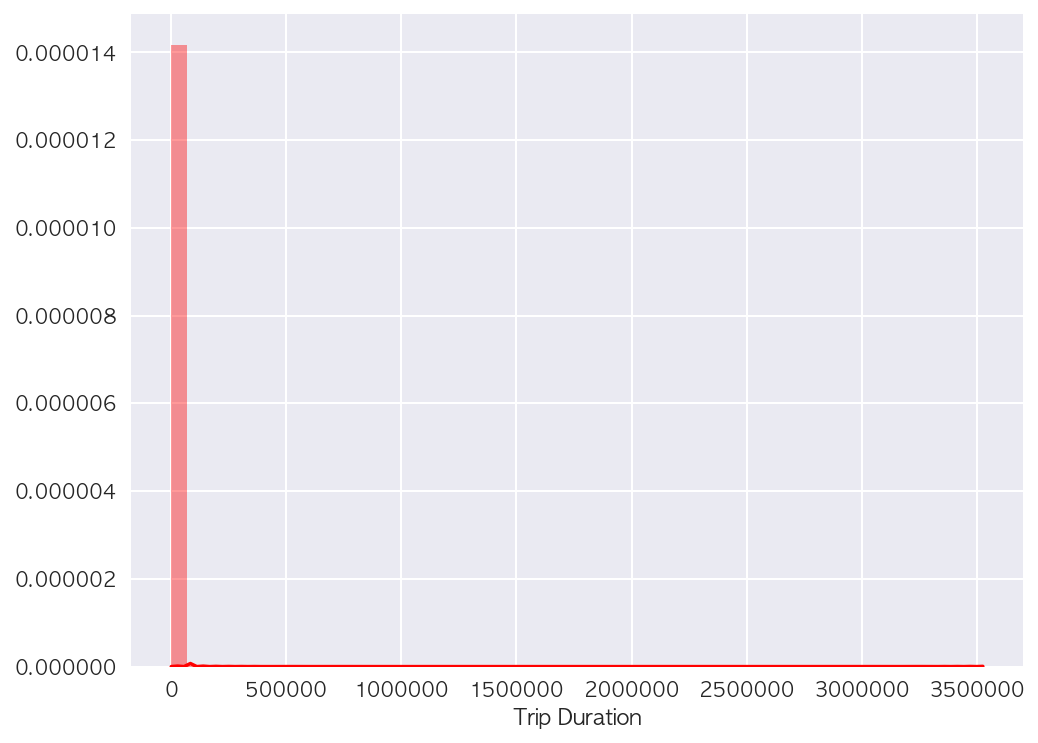

In [16]:
plt.figure(figsize=(8, 6))
sns.distplot(train["trip_duration"], color="r")
plt.xlabel("Trip Duration")
plt.show()

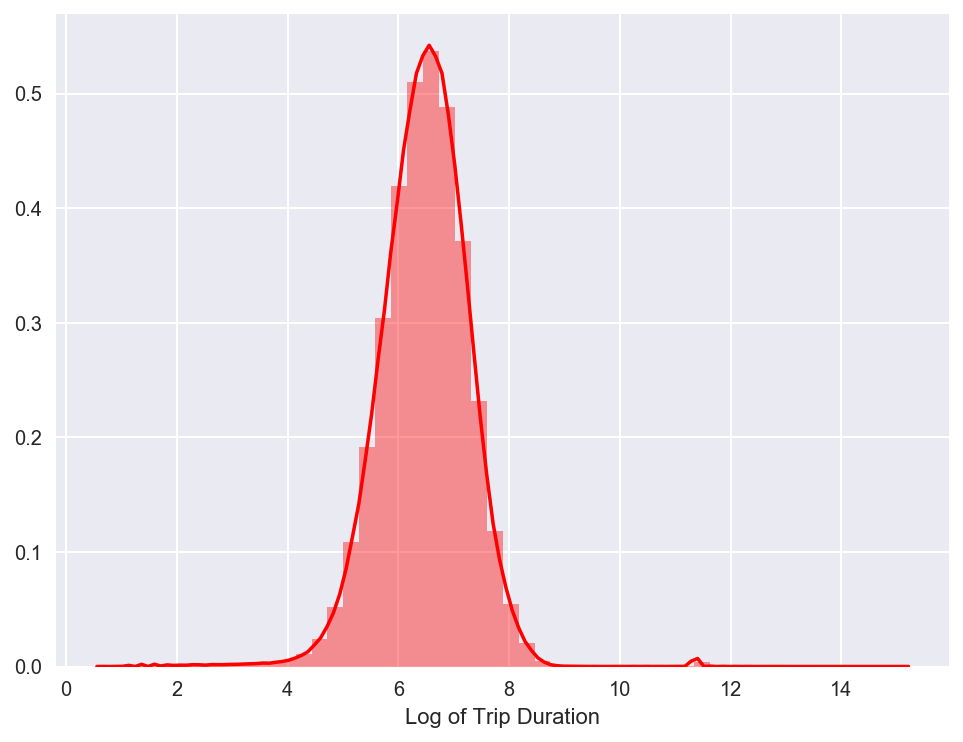

In [17]:
sns.set()
plt.figure(figsize=(8, 6))
sns.distplot(np.log(train['trip_duration']+1), color="r")
plt.xlabel("Log of Trip Duration")
plt.show()

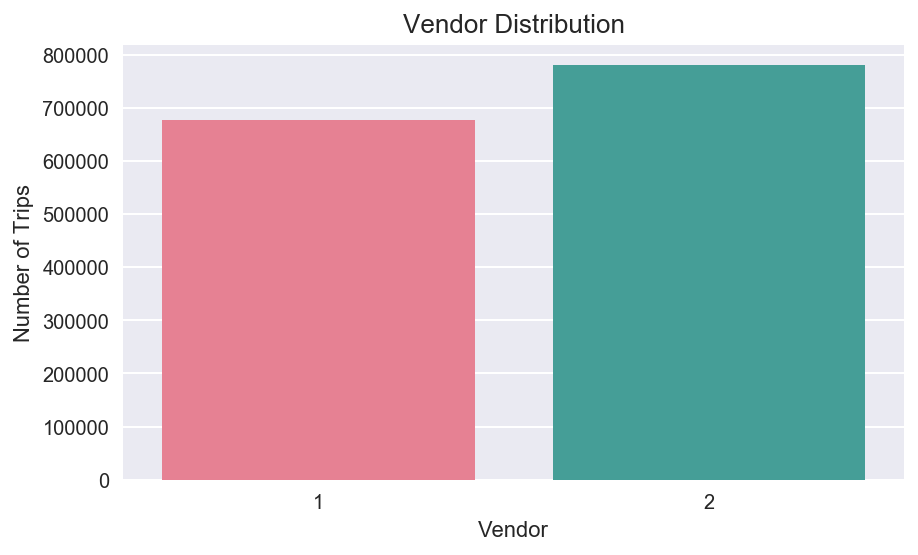

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(x="vendor_id", data=train, palette="husl")
plt.title("Vendor Distribution", fontsize=13)
plt.xlabel("Vendor")
plt.ylabel("Number of Trips")
plt.show()

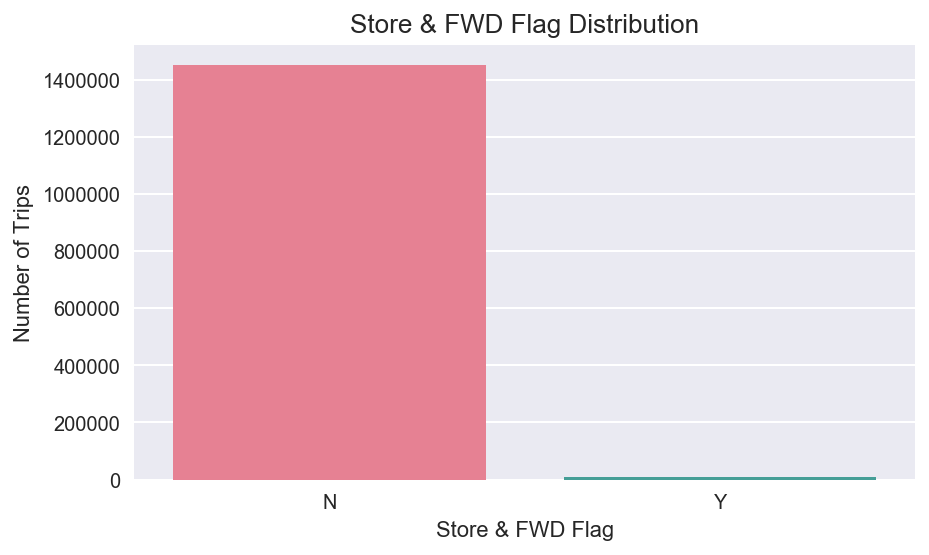

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(x="store_and_fwd_flag", data=train, palette="husl")
plt.title("Store & FWD Flag Distribution", fontsize=13)
plt.xlabel("Store & FWD Flag")
plt.ylabel("Number of Trips")
plt.show()

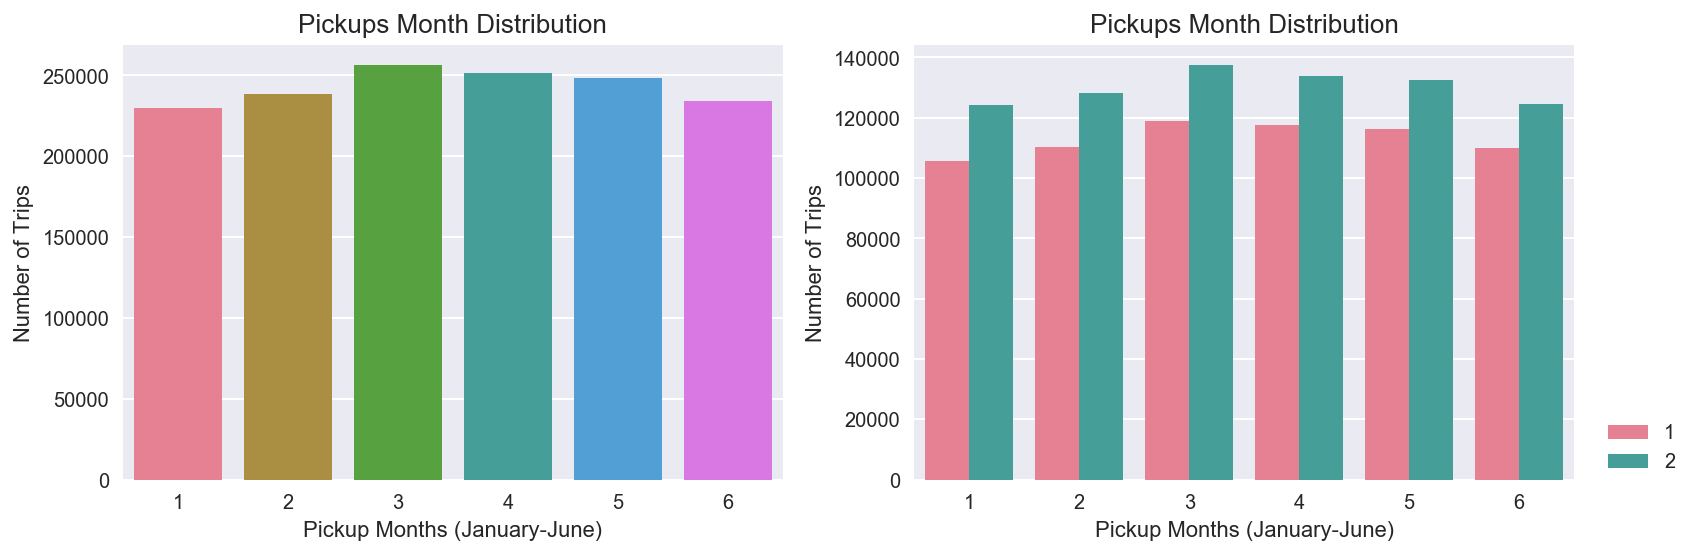

In [20]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
sns.countplot(x="pickup_month", data=train, palette="husl")
plt.title("Pickups Month Distribution", fontsize=13)
plt.xlabel("Pickup Months (January-June)")
plt.ylabel("Number of Trips")

plt.subplot(122)
sns.countplot(x="pickup_month", data=train, palette="husl", hue="vendor_id")
plt.title("Pickups Month Distribution", fontsize=13)
plt.xlabel("Pickup Months (January-June)")
plt.ylabel("Number of Trips")
plt.legend(loc=(1.04,0))

plt.show()

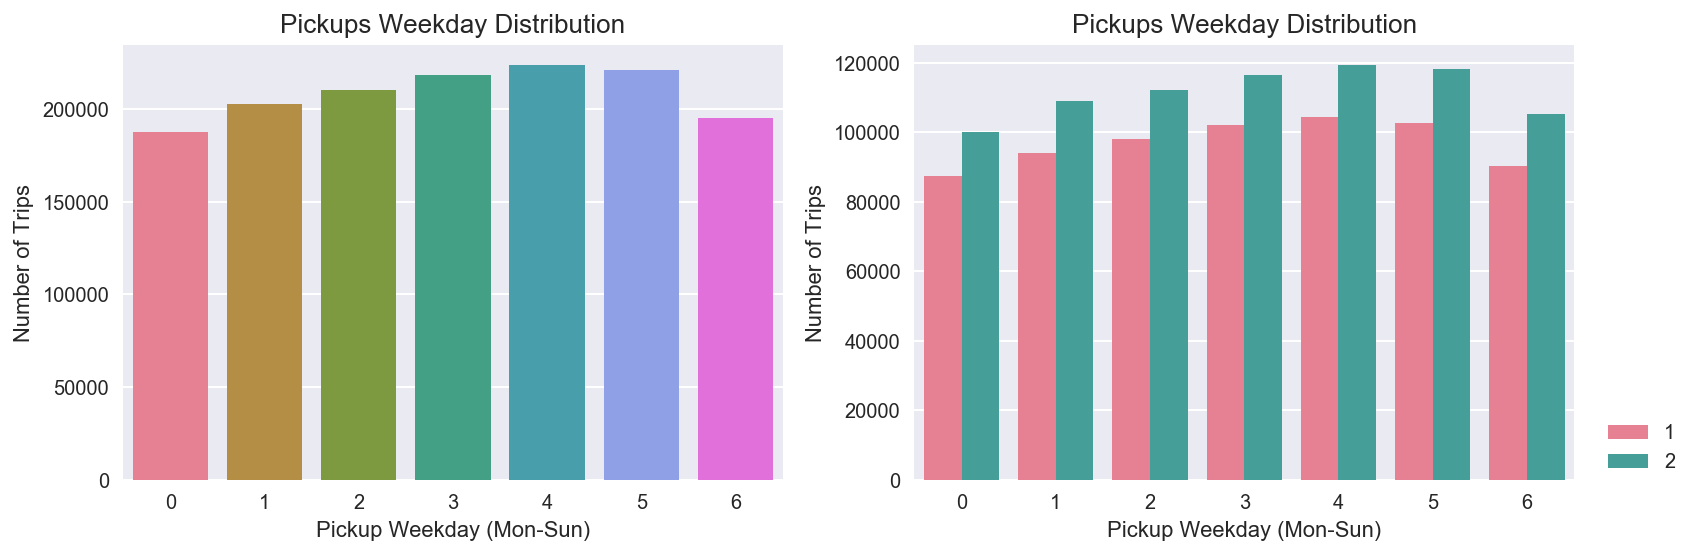

In [21]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
sns.countplot(x="pickup_weekday", data=train, palette="husl")
plt.title("Pickups Weekday Distribution", fontsize=13)
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Number of Trips")

plt.subplot(122)
sns.countplot(x="pickup_weekday", data=train, palette="husl", hue="vendor_id")
plt.title("Pickups Weekday Distribution", fontsize=13)
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Number of Trips")
plt.legend(loc=(1.04,0))

plt.show()

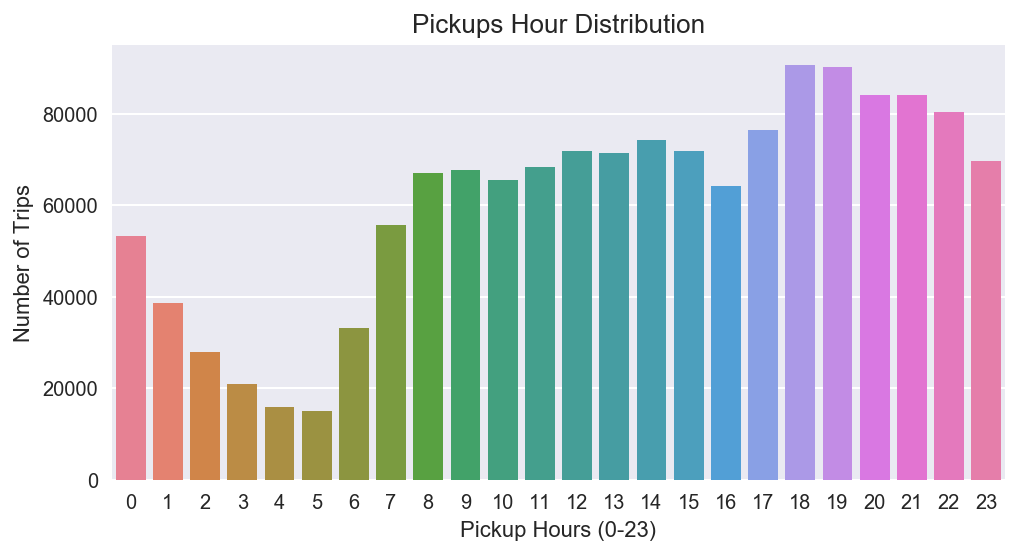

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x="pickup_hour", data=train, palette="husl")
plt.title("Pickups Hour Distribution", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Number of Trips")
plt.show()

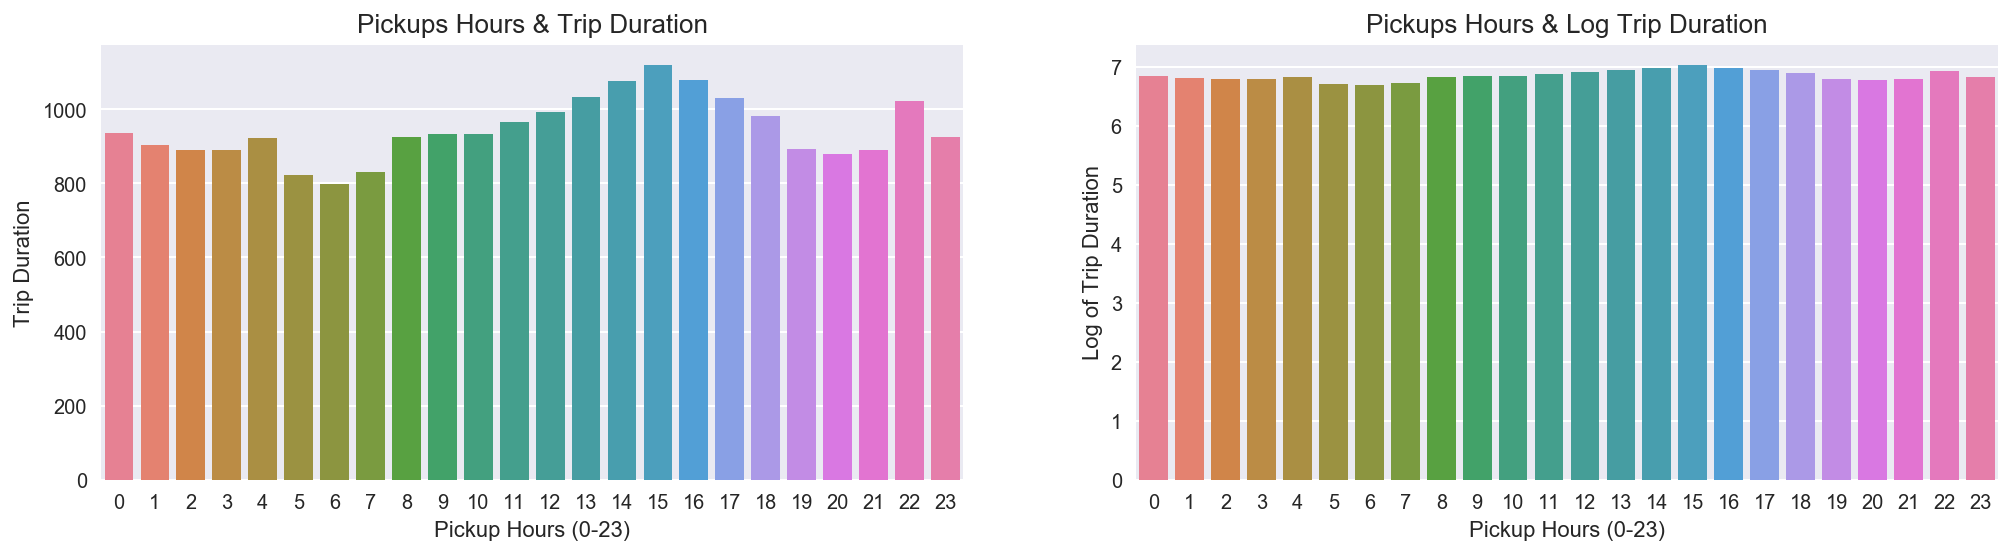

In [23]:
# Trip Duration의 경우, 상위 4개의 값이 워낙 큼. mean이 아닌 mode로 하면 차이는 더 많이 남)
# boxplot으로 보여주는 것도 좋을 것 같음 (단, log 처리하지 않으면 아웃라이어에 영향을 많이 받을 것)

data = train.loc[:, ["pickup_hour", "trip_duration"]].groupby("pickup_hour").mean()

plt.figure(figsize=(17, 4))

plt.subplot(121)
sns.barplot(x=data.index, y=data.trip_duration, data=data, palette="husl")
plt.title("Pickups Hours & Trip Duration", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Trip Duration")


plt.subplot(122)
sns.barplot(x=data.index, y=np.log(data.trip_duration+1), data=data, palette="husl")
plt.title("Pickups Hours & Log Trip Duration", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Log of Trip Duration")

plt.show()

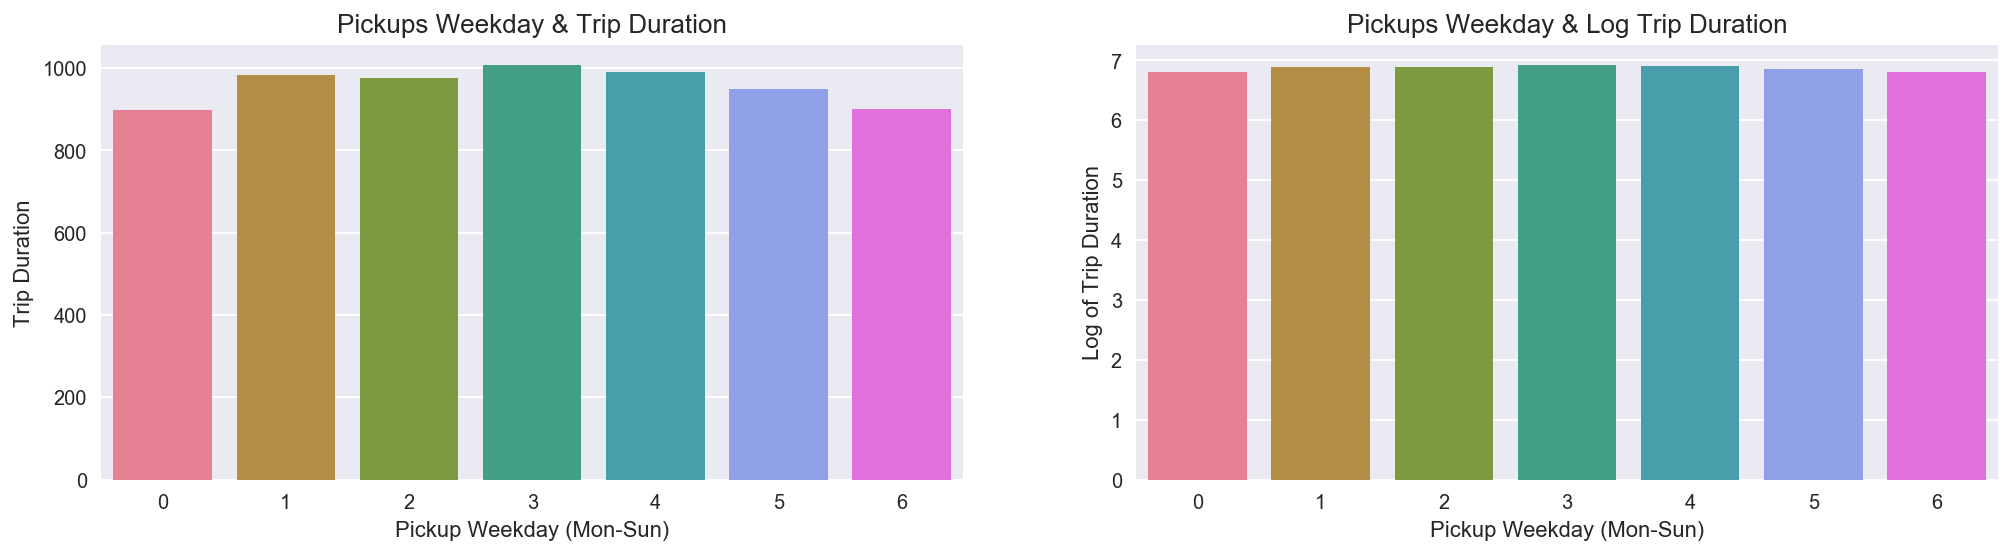

In [25]:
data = train.loc[:, ["pickup_weekday", "trip_duration"]].groupby("pickup_weekday").mean()

plt.figure(figsize=(17, 4))

plt.subplot(121)
sns.barplot(x=data.index, y=data.trip_duration, data=data, palette="husl")
plt.title("Pickups Weekday & Trip Duration", fontsize=13)
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Trip Duration")

plt.subplot(122)
sns.barplot(x=data.index, y=np.log(data.trip_duration+1), data=data, palette="husl")
plt.title("Pickups Weekday & Log Trip Duration", fontsize=13)
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Log of Trip Duration")

plt.show()

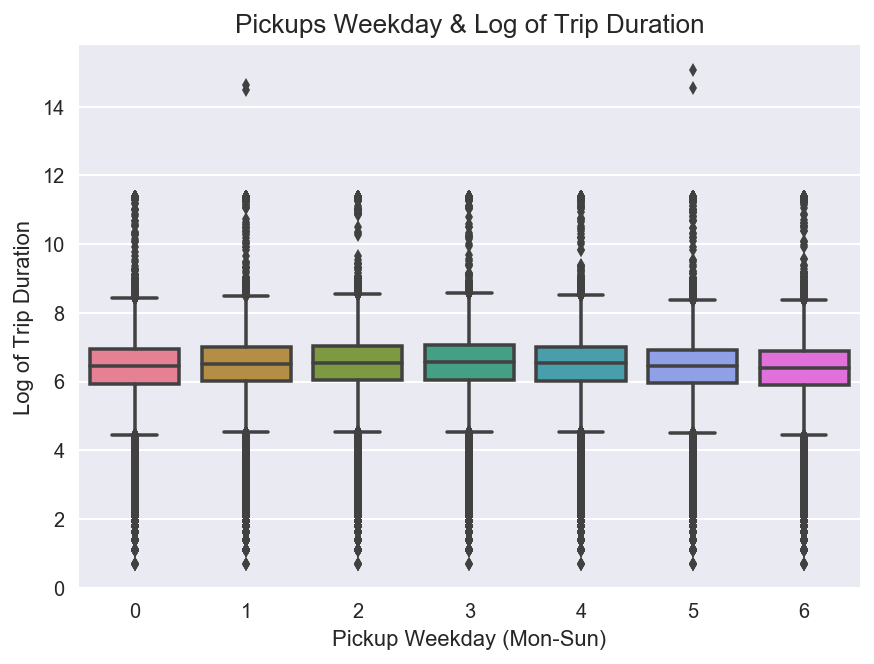

In [26]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=train["pickup_weekday"], 
            y=train["trip_duration"].apply(np.log1p), 
            data=train, palette="husl")
plt.title("Pickups Weekday & Log of Trip Duration", fontsize=13)
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Log of Trip Duration")

plt.show()

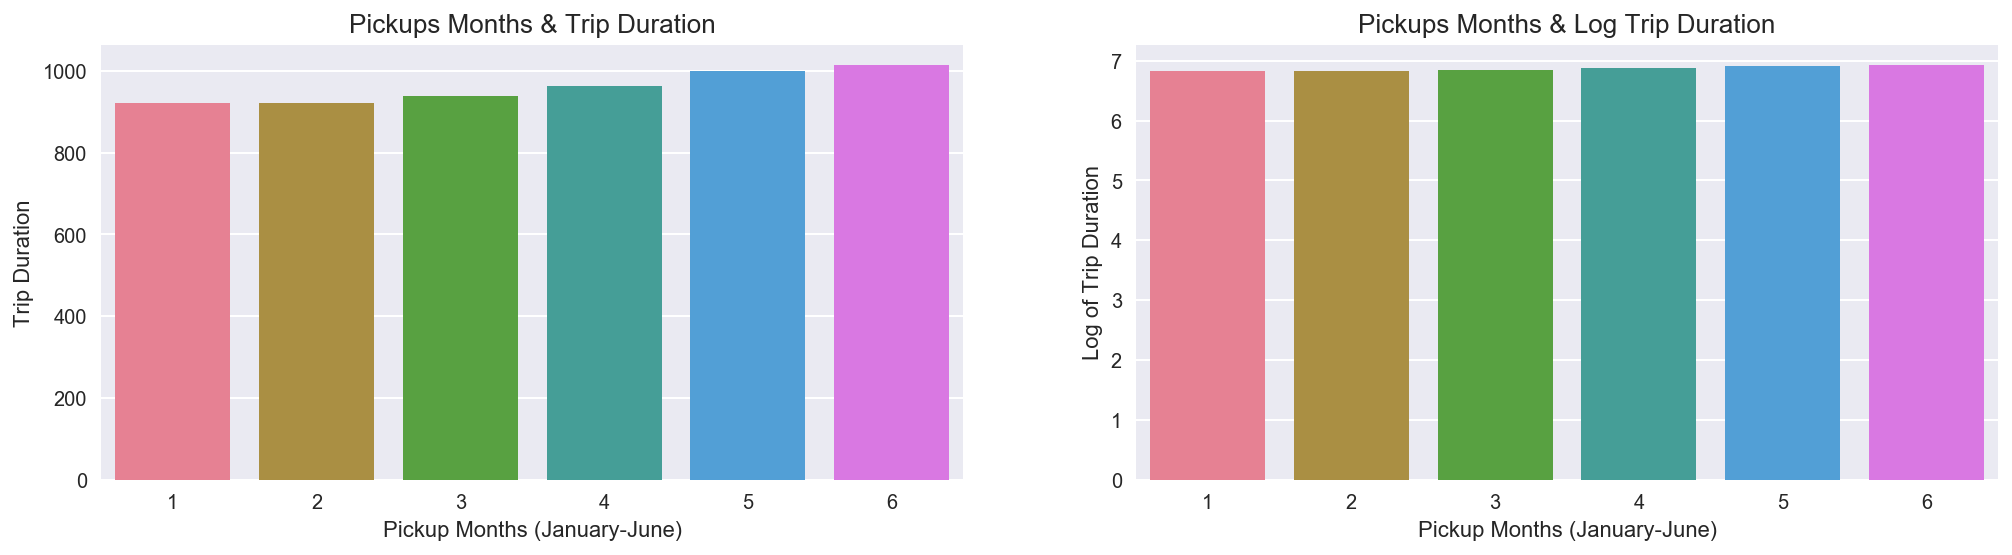

In [24]:
data = train.loc[:, ["pickup_month", "trip_duration"]].groupby("pickup_month").mean()

plt.figure(figsize=(17, 4))

plt.subplot(121)
sns.barplot(x=data.index, y=data.trip_duration, data=data, palette="husl")
plt.title("Pickups Months & Trip Duration", fontsize=13)
plt.xlabel("Pickup Months (January-June)")
plt.ylabel("Trip Duration")

plt.subplot(122)
sns.barplot(x=data.index, y=np.log(data.trip_duration+1), data=data, palette="husl")
plt.title("Pickups Months & Log Trip Duration", fontsize=13)
plt.xlabel("Pickup Months (January-June)")
plt.ylabel("Log of Trip Duration")

plt.show()

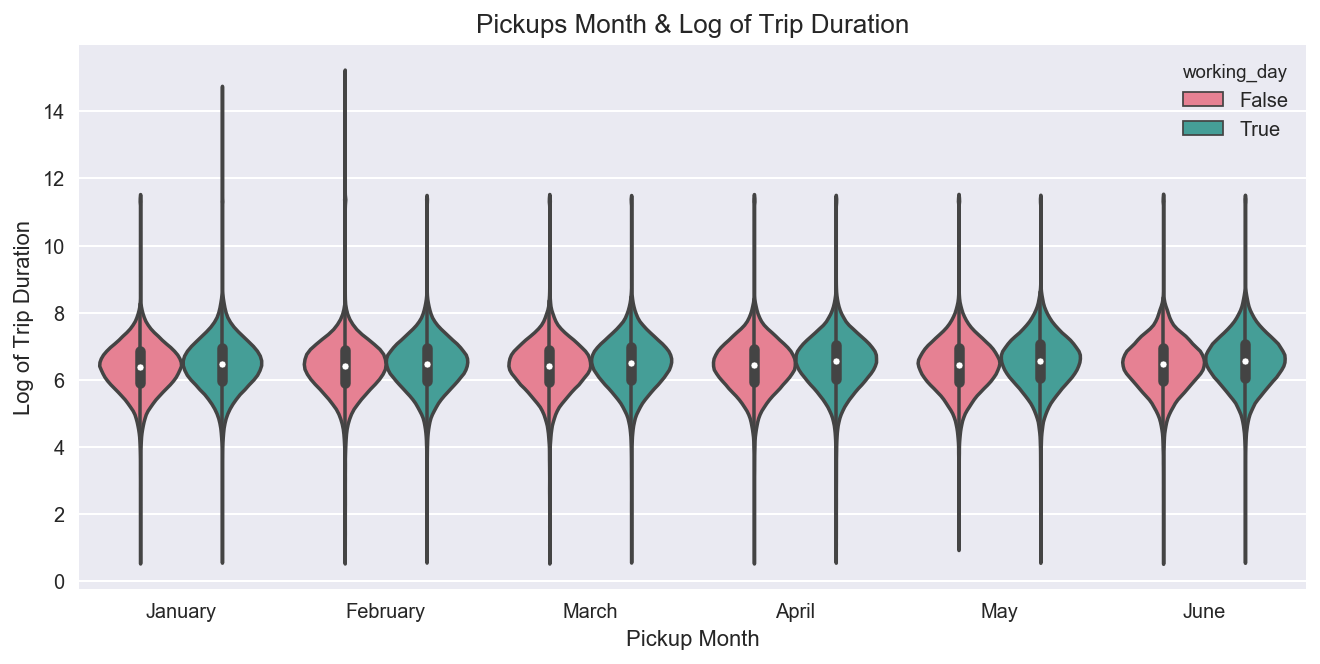

In [103]:
working_day = [0, 1, 2, 3, 4] # Mon-Fri

wd = train.loc[:, ["pickup_weekday", "pickup_month", "trip_duration"]]
wd["working_day"] = wd["pickup_weekday"].isin(working_day)

plt.figure(figsize=(11, 5))
sns.violinplot(x=wd["pickup_month"], 
               y=wd["trip_duration"].apply(np.log1p),
               hue="working_day",
               data=wd, palette="husl")
plt.title("Pickups Month & Log of Trip Duration", fontsize=13)
plt.xlabel("Pickup Month")
plt.ylabel("Log of Trip Duration")
plt.xticks(range(0, 6), month)
plt.show()

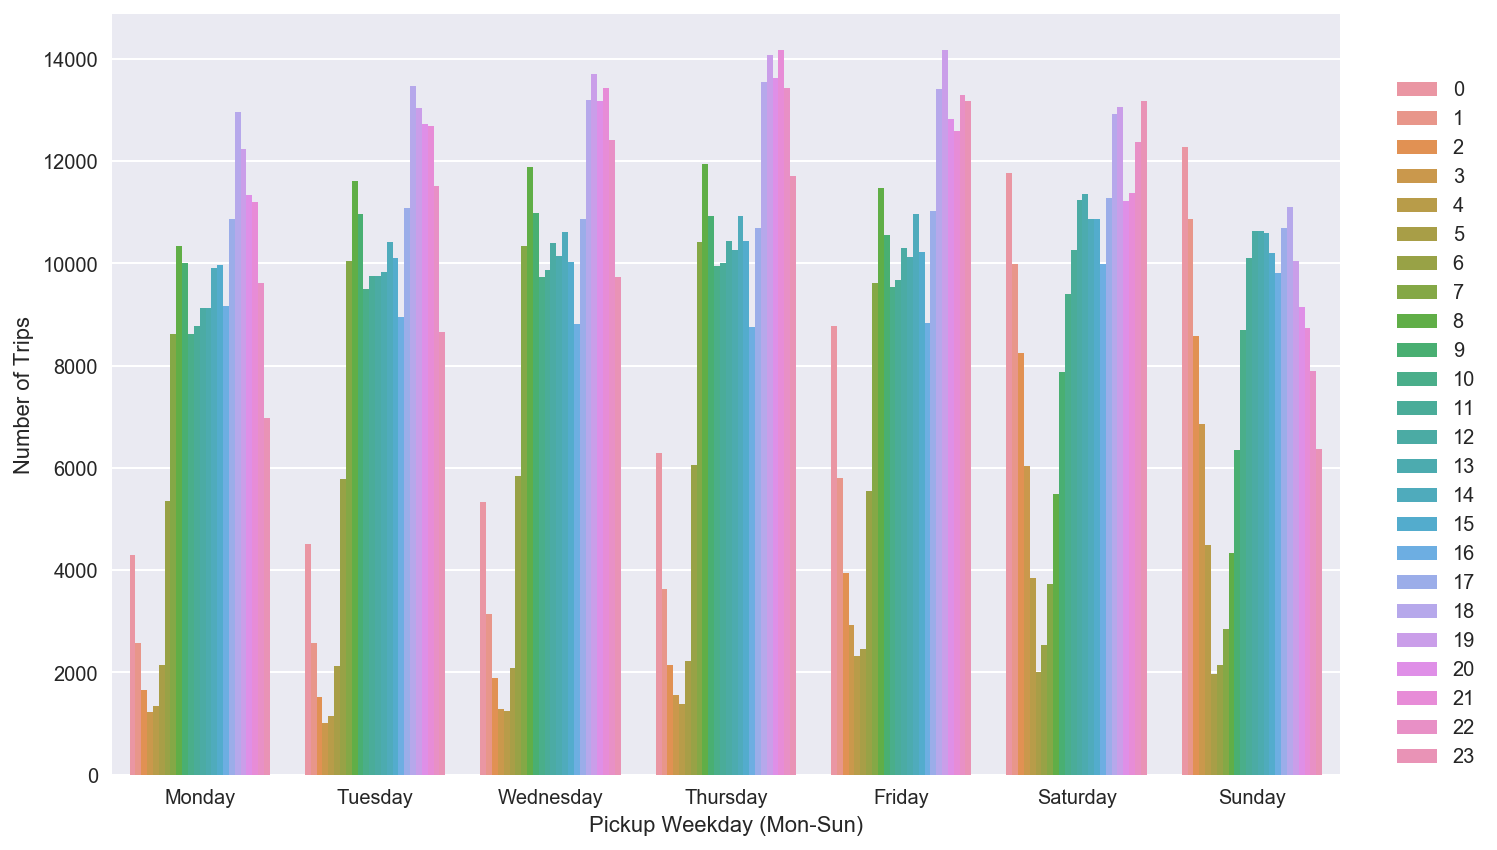

In [105]:
plt.figure(figsize=(11, 7))
sns.countplot(x="pickup_weekday", data=train, hue="pickup_hour")
plt.xlabel("Pickup Weekday (Mon-Sun)")
plt.ylabel("Number of Trips")
plt.xticks(range(0,7), weekday)
plt.legend(loc=(1.04,0))
plt.show()

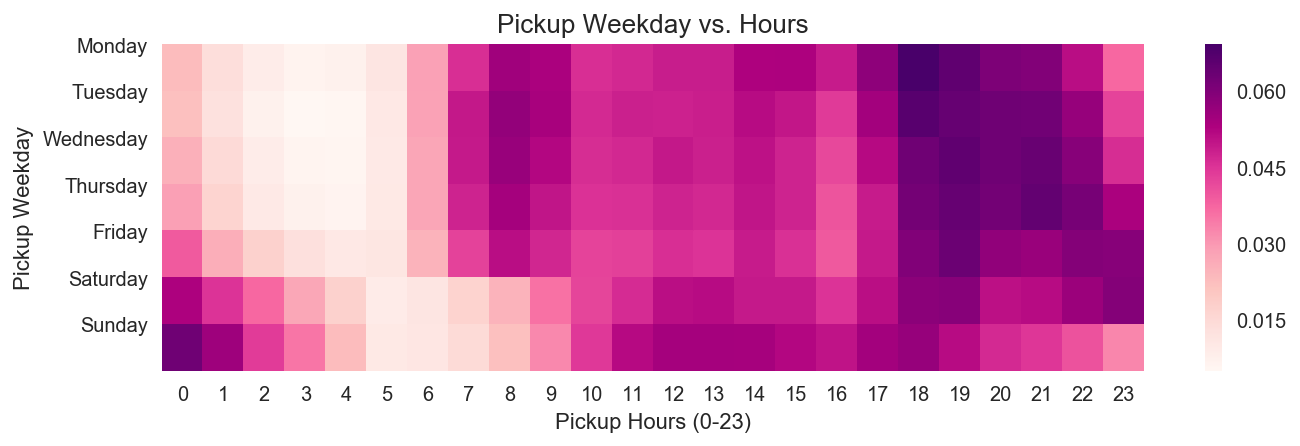

In [107]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(11,3))
sns.heatmap(data=pd.crosstab(train["pickup_weekday"], 
                             train["pickup_hour"], 
                             values=train["vendor_id"], 
                             aggfunc="count",
                             normalize="index"), cmap="RdPu")

plt.title("Pickup Weekday vs. Hours", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Pickup Weekday")
plt.yticks(range(0,7), weekday, rotation="horizontal")
plt.show()

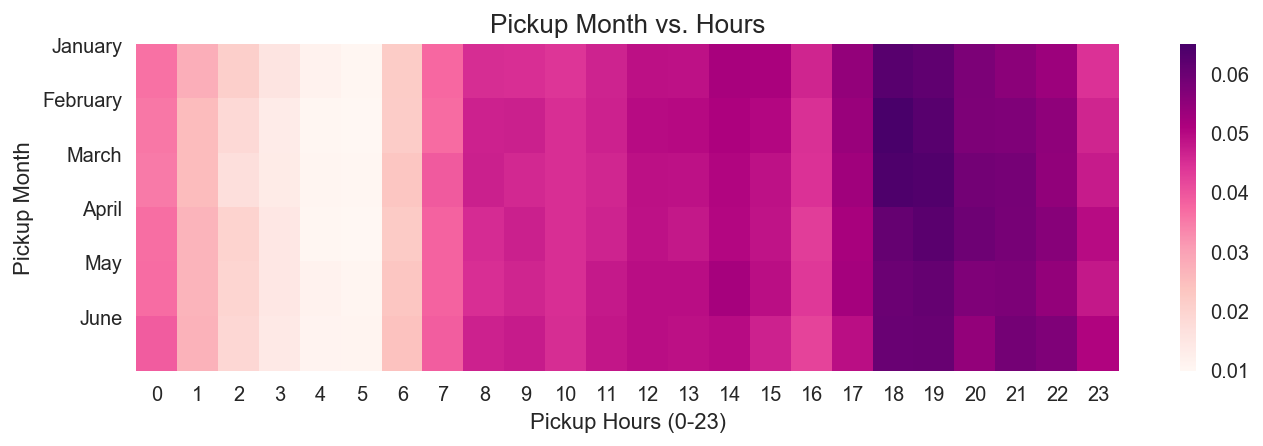

In [108]:
month = ["January", "February", "March", "April", "May", "June"]

plt.figure(figsize=(11,3))
sns.heatmap(data=pd.crosstab(train["pickup_month"], 
                             train["pickup_hour"], 
                             values=train["vendor_id"], 
                             aggfunc="count",
                             normalize="index"), cmap="RdPu")

plt.title("Pickup Month vs. Hours", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Pickup Month")
plt.yticks(range(0,6), month, rotation="horizontal")
plt.show()

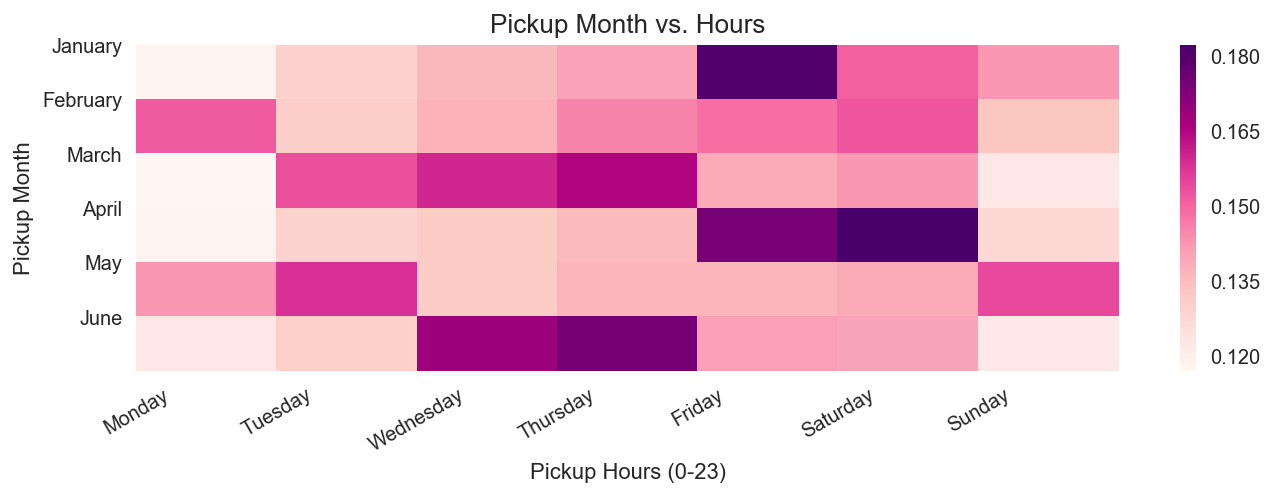

In [109]:
plt.figure(figsize=(11,3))
sns.heatmap(data=pd.crosstab(train["pickup_month"], 
                             train["pickup_weekday"], 
                             values=train["vendor_id"], 
                             aggfunc="count",
                             normalize="index"), cmap="RdPu")

plt.title("Pickup Month vs. Hours", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Pickup Month")
plt.xticks(range(0,7), weekday, rotation=30)
plt.yticks(range(0,6), month, rotation="horizontal")
plt.show()

## 승객수

In [111]:
train['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [116]:
print("가장 적은 탑승 인원: {}명".format(train["passenger_count"].min()))
print("가장 많은 탑승 인원: {}명".format(train["passenger_count"].max()))

가장 적은 탑승 인원: 0명
가장 많은 탑승 인원: 9명


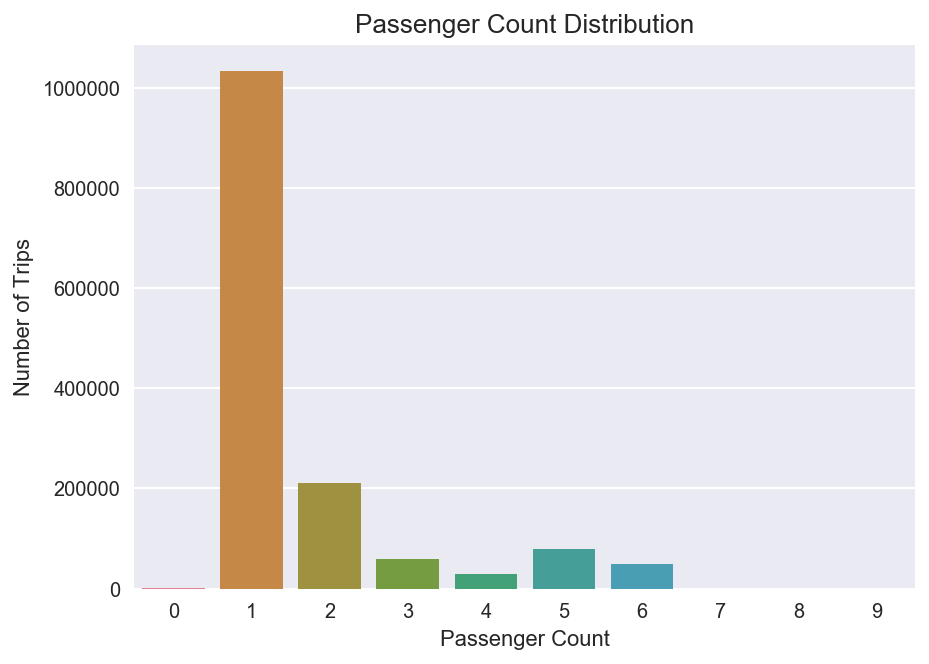

In [28]:
plt.figure(figsize=(7, 5))
sns.countplot(x='passenger_count', data=train, palette="husl")
plt.title("Passenger Count Distribution", fontsize=13)
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()

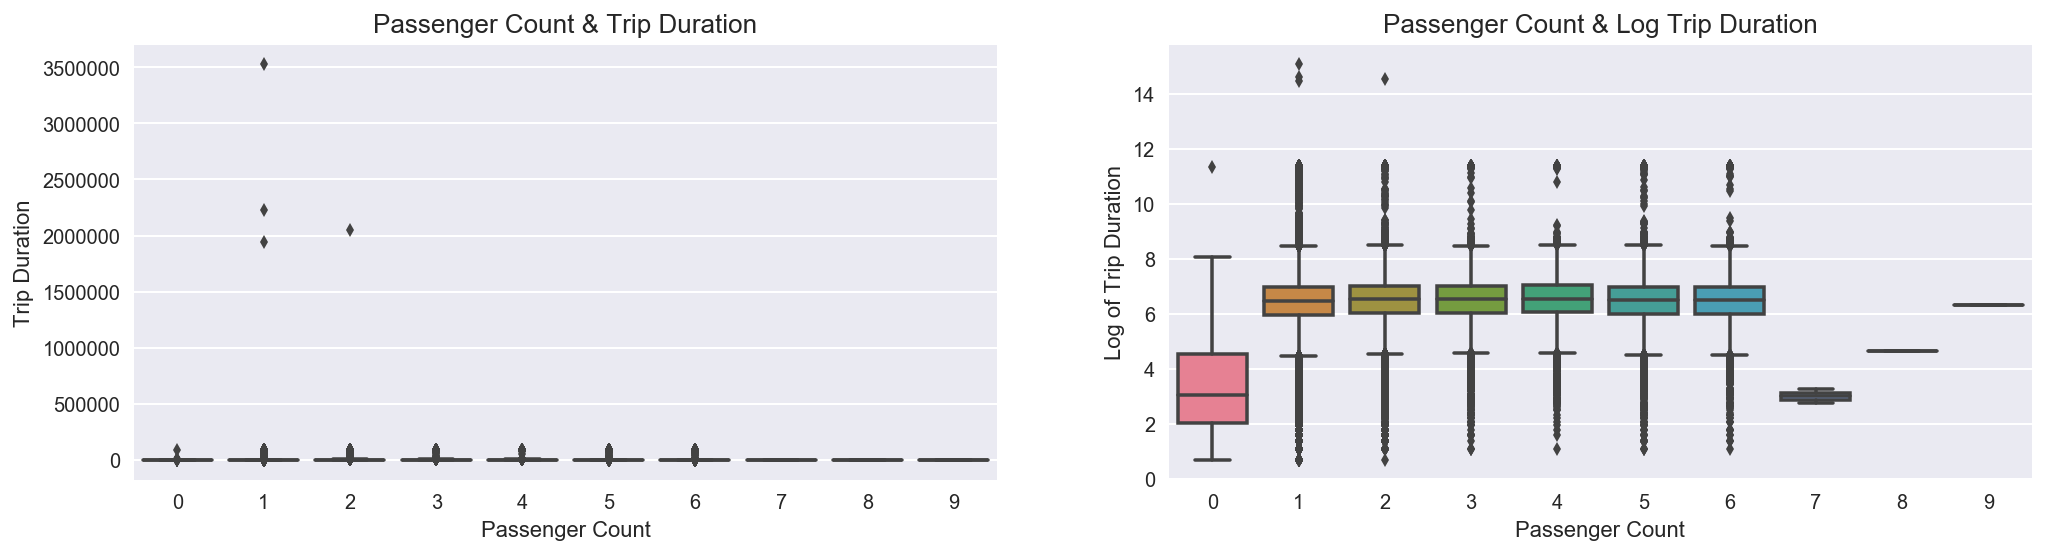

In [32]:
# 아웃라이어 아직 제거하지 않아서 아웃라이어에 영향을 많이 받음

plt.figure(figsize=(17, 4))

plt.subplot(121)
sns.boxplot(x="passenger_count", 
            y=train["trip_duration"], 
            data=train,
            palette="husl")
plt.title("Passenger Count & Trip Duration", fontsize=13)
plt.xlabel("Passenger Count")
plt.ylabel("Trip Duration")

plt.subplot(122)
sns.boxplot(x="passenger_count", 
            y=train["trip_duration"].apply(np.log1p), 
            data=train,
            palette="husl")
plt.title("Passenger Count & Log Trip Duration", fontsize=13)
plt.xlabel("Passenger Count")
plt.ylabel("Log of Trip Duration")

plt.show()

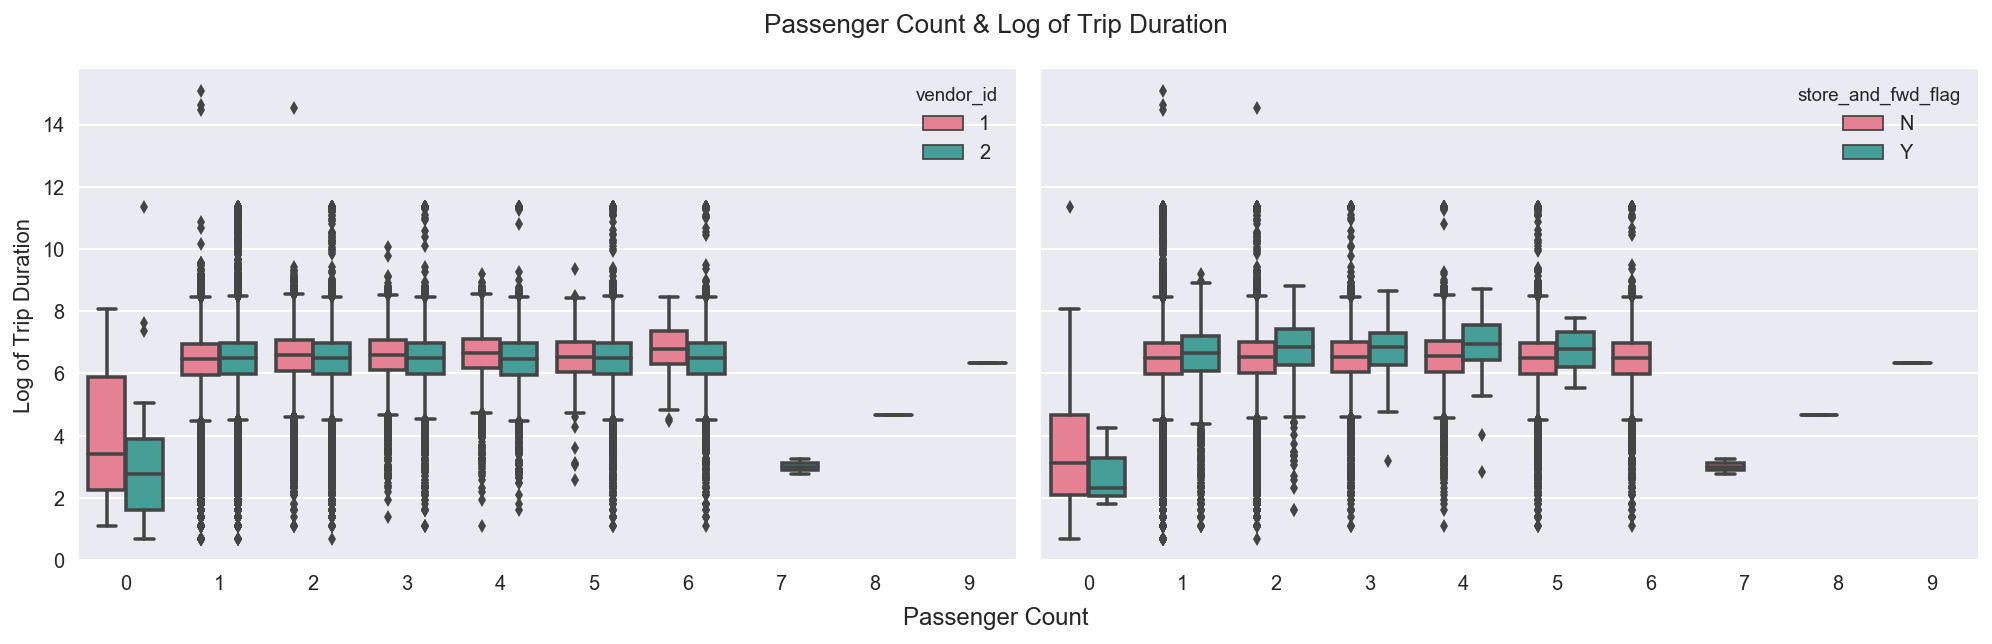

In [156]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14, 4))

sns.boxplot(x="passenger_count", 
            y=train["trip_duration"].apply(np.log1p), 
            hue="vendor_id",
            data=train,
            palette="husl", ax=ax1)

ax1.set_xlabel(""); ax1.set_ylabel("Log of Trip Duration")

sns.boxplot(x="passenger_count", 
            y=train["trip_duration"].apply(np.log1p), 
            hue="store_and_fwd_flag",
            data=train,
            palette="husl", ax=ax2)
ax2.set_xlabel(""); ax2.set_ylabel("")

plt.suptitle("Passenger Count & Log of Trip Duration", y=1.05, fontsize=13)
plt.tight_layout()
f.text(0.5, -0.01, "Passenger Count", ha="center")

plt.show()

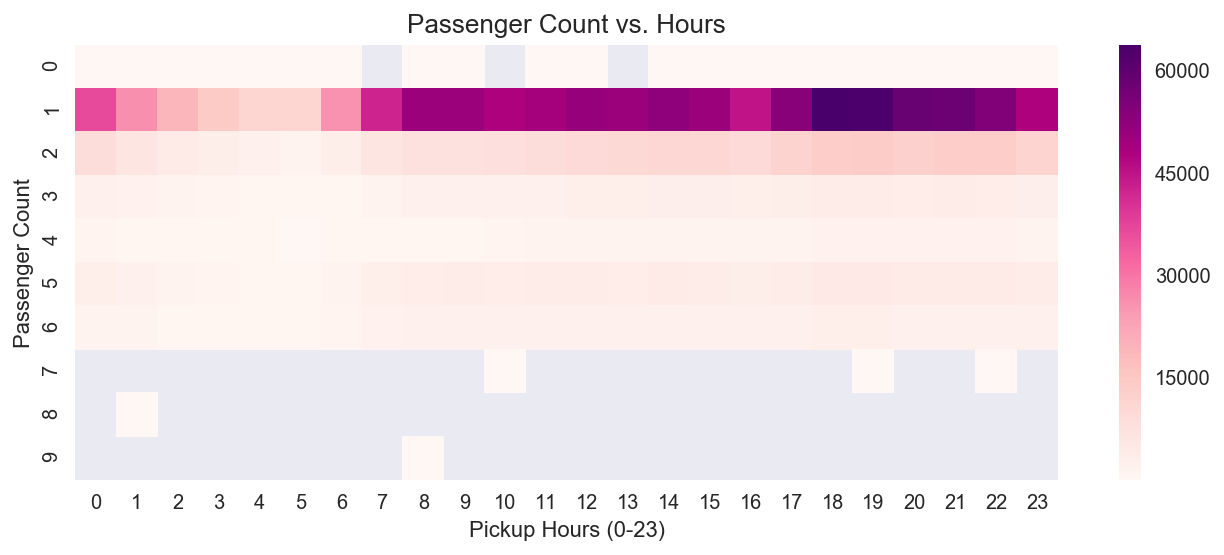

In [169]:
plt.figure(figsize=(11,4))
sns.heatmap(data=pd.crosstab(train["passenger_count"], 
                             train["pickup_hour"], 
                             values=train["vendor_id"], 
                             aggfunc="count",
                             normalize=False), cmap="RdPu")
plt.title("Passenger Count vs. Hours", fontsize=13)
plt.xlabel("Pickup Hours (0-23)")
plt.ylabel("Passenger Count")
plt.show()

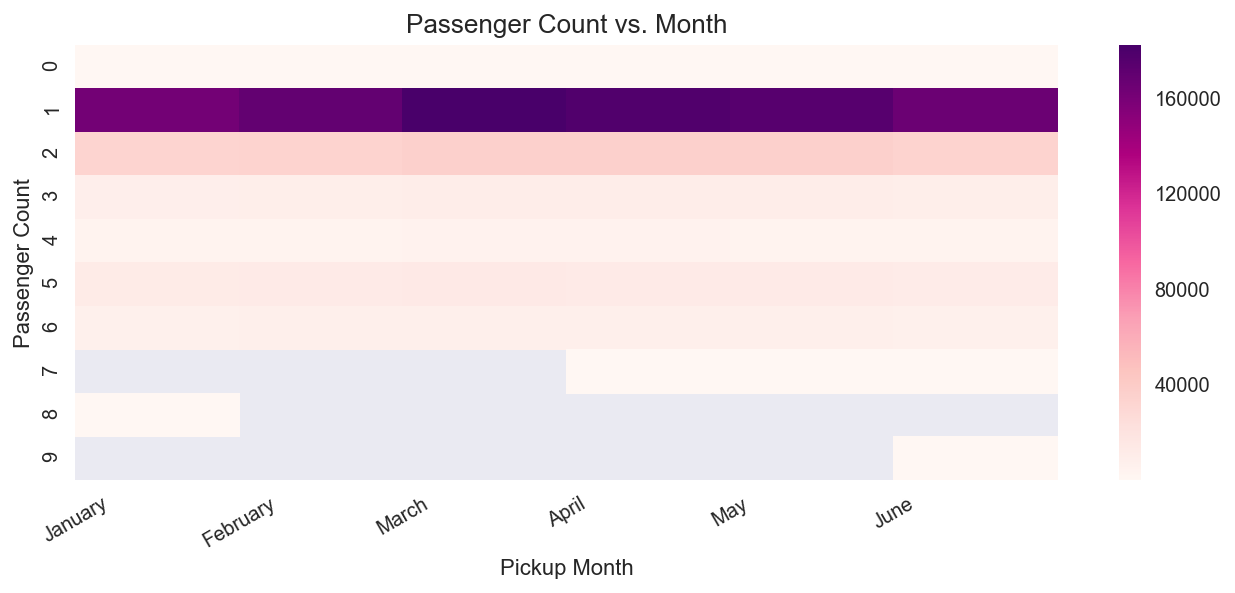

In [178]:
plt.figure(figsize=(11,4))
sns.heatmap(data=pd.crosstab(train["passenger_count"], 
                             train["pickup_month"], 
                             values=train["vendor_id"], 
                             aggfunc="count",
                             normalize=False), cmap="RdPu")
plt.title("Passenger Count vs. Month", fontsize=13)
plt.xlabel("Pickup Month")
plt.ylabel("Passenger Count")
plt.xticks(range(0,6), month, rotation=30)
plt.show()

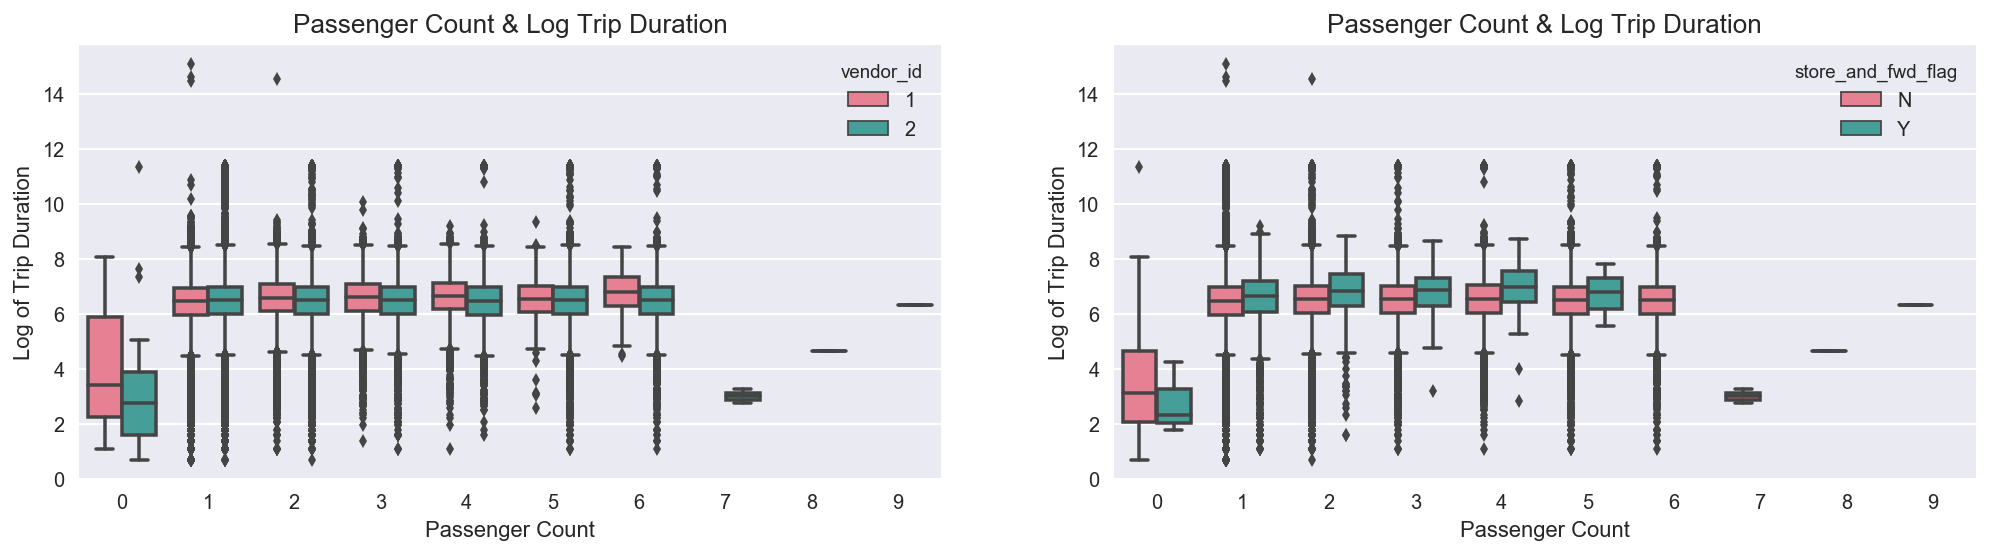

In [69]:
# plt.figure(figsize=(17, 4))

# plt.subplot(121)
# sns.boxplot(x="passenger_count", 
#             y=train["trip_duration"].apply(np.log1p), 
#             hue="vendor_id",
#             data=train,
#             palette="husl")
# plt.title("Passenger Count & Log Trip Duration", fontsize=13)
# plt.xlabel("Passenger Count")
# plt.ylabel("Log of Trip Duration")

# plt.subplot(122)
# sns.boxplot(x="passenger_count", 
#             y=train["trip_duration"].apply(np.log1p), 
#             hue="store_and_fwd_flag",
#             data=train,
#             palette="husl")
# plt.title("Passenger Count & Log Trip Duration", fontsize=13)
# plt.xlabel("Passenger Count")
# plt.ylabel("Log of Trip Duration")

# plt.show()

### Data 뽑기 전 사전작업

In [29]:
### 승객수 / 승차시간 / 승차요일 간의 관계 파악을 위한 표 작성

taxi_df2 = pd.DataFrame(taxi_df1, columns=["passenger_count", "pickup_hour", "pickup_weekday", "trip_duration", "count"])
taxi_df2 = taxi_df1.groupby(["passenger_count", "pickup_hour", "pickup_weekday"]).size().reset_index(name='count')
taxi_df2.tail()

,passenger_count,pickup_hour,pickup_weekday,count
1008,7,10,1,1
1009,7,19,5,1
1010,7,22,6,1
1011,8,1,4,1
1012,9,8,4,1


### EDA - 승객 수  data

In [30]:
### 승객수 - Max / Min

In [31]:
print(taxi_df2["passenger_count"].min())
print(taxi_df2["passenger_count"].max())

1
9


### EDA 결과
- 승객수 Max 9인, Min 0인 : 0인, 7인이상 삭제 검토 (총 65건)
- 승객수 지표 : 1인 승차객이 전체 약 146만 건 중 103만 건의 비중, 2인 승차객 21만건 / 5인 / 3인 순
- 승객수&승차시각 : 오전 8시 이후 1인 승차객 중심으로 전 시간대 고른 분포
- 승객수&승차요일 : 전반적으로 고른 분포 , 전반적으로 주말보다 수~금 승차건수가 높음
- 승객수&운행시간 : 1인 승객이 평균 1~2분정도 짧게 운행. 전반적으로 1000~1100초 (16분대), 탑승객 없는 택시 유일하게 30분 수준 (공항으로 이동?)

In [ ]:
import folium
import json
geo_path = '../dataset/geojson/state.geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
map = folium.Map(location=[40.766321, -73.965457], zoom_start=11)

for idx, row in taxi[:150].iterrows():
    if pd.notnull(row["pickup_latitude"]):
        folium.Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(map)
        
map

In [42]:
# 뉴욕 시 경계를 벗어나는 위/경도 제거

# city_long_border = (-74.03, -73.75)
# city_lat_border = (40.63, 40.85) 

taxi = taxi[taxi['pickup_longitude'] <= -73.75]
taxi = taxi[taxi['pickup_longitude'] >= -74.03]
taxi = taxi[taxi['pickup_latitude'] <= 40.85]
taxi = taxi[taxi['pickup_latitude'] >= 40.63]
taxi = taxi[taxi['dropoff_longitude'] <= -73.75]
taxi = taxi[taxi['dropoff_longitude'] >= -74.03]
taxi = taxi[taxi['dropoff_latitude'] <= 40.85]
taxi = taxi[taxi['dropoff_latitude'] >= 40.63]

In [43]:
pickup_lat = tuple(taxi["pickup_latitude"])
pickup_lng = tuple(taxi["pickup_longitude"])
dropoff_lat = tuple(taxi["dropoff_latitude"])
dropoff_lng = tuple(taxi["dropoff_longitude"])

In [44]:
pickup_loc = tuple(zip(pickup_lat, pickup_lng))
dropoff_loc = tuple(zip(dropoff_lat, dropoff_lng))

In [45]:
print(len(pickup_loc))
print(len(dropoff_loc))

1436940
1436940


In [46]:
# vincenty distacne
import geopy.distance
from tqdm import tqdm_notebook

vincenty_distance = []
for i in tqdm_notebook(range(len(pickup_loc))):
    vincenty_distance.append(geopy.distance.vincenty(pickup_loc[i], dropoff_loc[i]).km)

HBox(children=(IntProgress(value=0, max=1436940), HTML(value='')))

In [47]:
taxi.loc[:, "vincenty_distance"] = vincenty_distance
taxi.loc[:, ["id", "vincenty_distance"]].head()

,id,vincenty_distance
0,id2875421,1.502172
1,id2377394,1.808660
2,id3858529,6.379687
3,id3504673,1.483632
4,id2181028,1.187038


In [48]:
# def haversine_array(lat1, lng1, lat2, lng2):
#     lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
#     AVG_EARTH_RADIUS = 6371  # in km
#     lat = lat2 - lat1
#     lng = lng2 - lng1
#     d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
#     h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
#     return h

In [49]:
# haversine distance

# taxi["haversine_distance"] = taxi.apply(lambda row: haversine(
#     (row["pickup_latitude"], row["pickup_longitude"]), 
#     (row["dropoff_latitude"], row["dropoff_longitude"])), axis=1)

# taxi["log_haversine_distance"] = np.log1p(taxi["haversine_distance"]) 

In [50]:
# taxi.loc[:, ["vincenty_distance", "haversine_distance"]].sort_values("vincenty_distance", ascending=False).head(5)

In [51]:
taxi["duration_min"] = taxi["trip_duration"] / 60.0
taxi["log_duration"] = np.log1p(taxi["duration_min"])
taxi["log_vincenty_distance"] = np.log1p(taxi["vincenty_distance"])

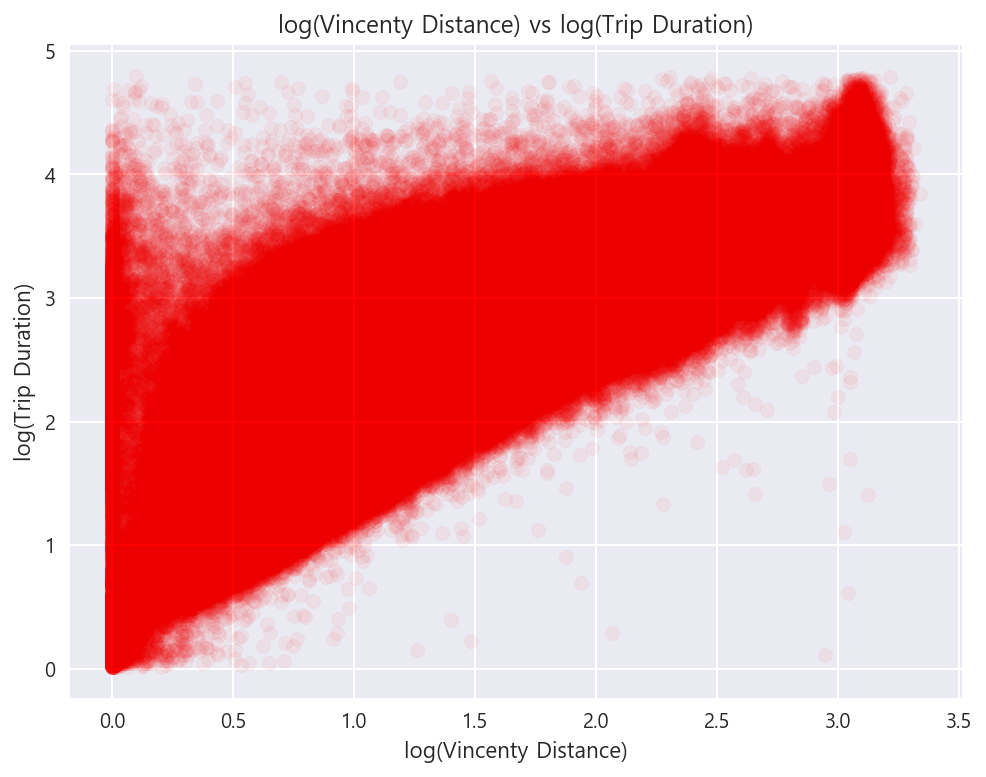

In [52]:
#%% plot scatter of trip duration vs. aerial distance between pickup and dropoff

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# ax[0].scatter(taxi["vincenty_distance"], taxi["duration_min"], c='r', s=5, alpha=0.01); 
# ax[0].set_xlabel("Vincenty distance (km)"); ax[0].set_ylabel("Trip duration (min)")
# ax[0].set_xlim(taxi["vincenty_distance"].min(), taxi["vincenty_distance"].max())
# ax[0].set_ylim(taxi["duration_min"].min(), taxi["duration_min"].max())
# ax[0].set_title("Trip duration vs Vincenty trip distance")

# ax[1].scatter(taxi["log_vincenty_distance"], taxi["duration_min"], c='r', s=5, alpha=0.01); 
# ax[1].set_xlabel("log(1+Vincenty distance) (km)"); ax[1].set_ylabel("Trip duration (min)")
# ax[1].set_xlim(taxi["log_vincenty_distance"].min(), taxi["log_vincenty_distance"].max())
# ax[1].set_ylim(taxi["duration_min"].min(), taxi["duration_min"].max())
# ax[1].set_title("Trip duration vs Log of vincenty trip distance")

# ax[2].scatter(taxi["log_vincenty_distance"], taxi["log_duration"], c='r', s=5, alpha=0.01); 
# ax[2].set_xlabel("log(1+Vincenty distance) (km)"); ax[2].set_ylabel("log(1+Trip duration) (min)")
# ax[2].set_xlim(taxi["log_vincenty_distance"].min(), taxi["log_vincenty_distance"].max())
# ax[2].set_ylim(taxi["log_duration"].min(), taxi["log_duration"].max())
# ax[2].set_title("Log of Trip duration vs Log of vincenty trip distance")

# plt.figure(figsize=(8, 6))
# plt.scatter(taxi.log_vincenty_distance, taxi.log_duration ,color="r", alpha=0.05)
# plt.ylabel("log(Trip Duration)")
# plt.xlabel("log(Vincenty Distance)")
# plt.title("log(Vincenty Distance) vs log(Trip Duration)");

plt.figure(figsize=(8, 6))
plt.scatter(taxi.log_vincenty_distance, taxi.log_duration ,color="r", alpha=0.05)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Vincenty Distance)")
plt.title("log(Vincenty Distance) vs log(Trip Duration)");

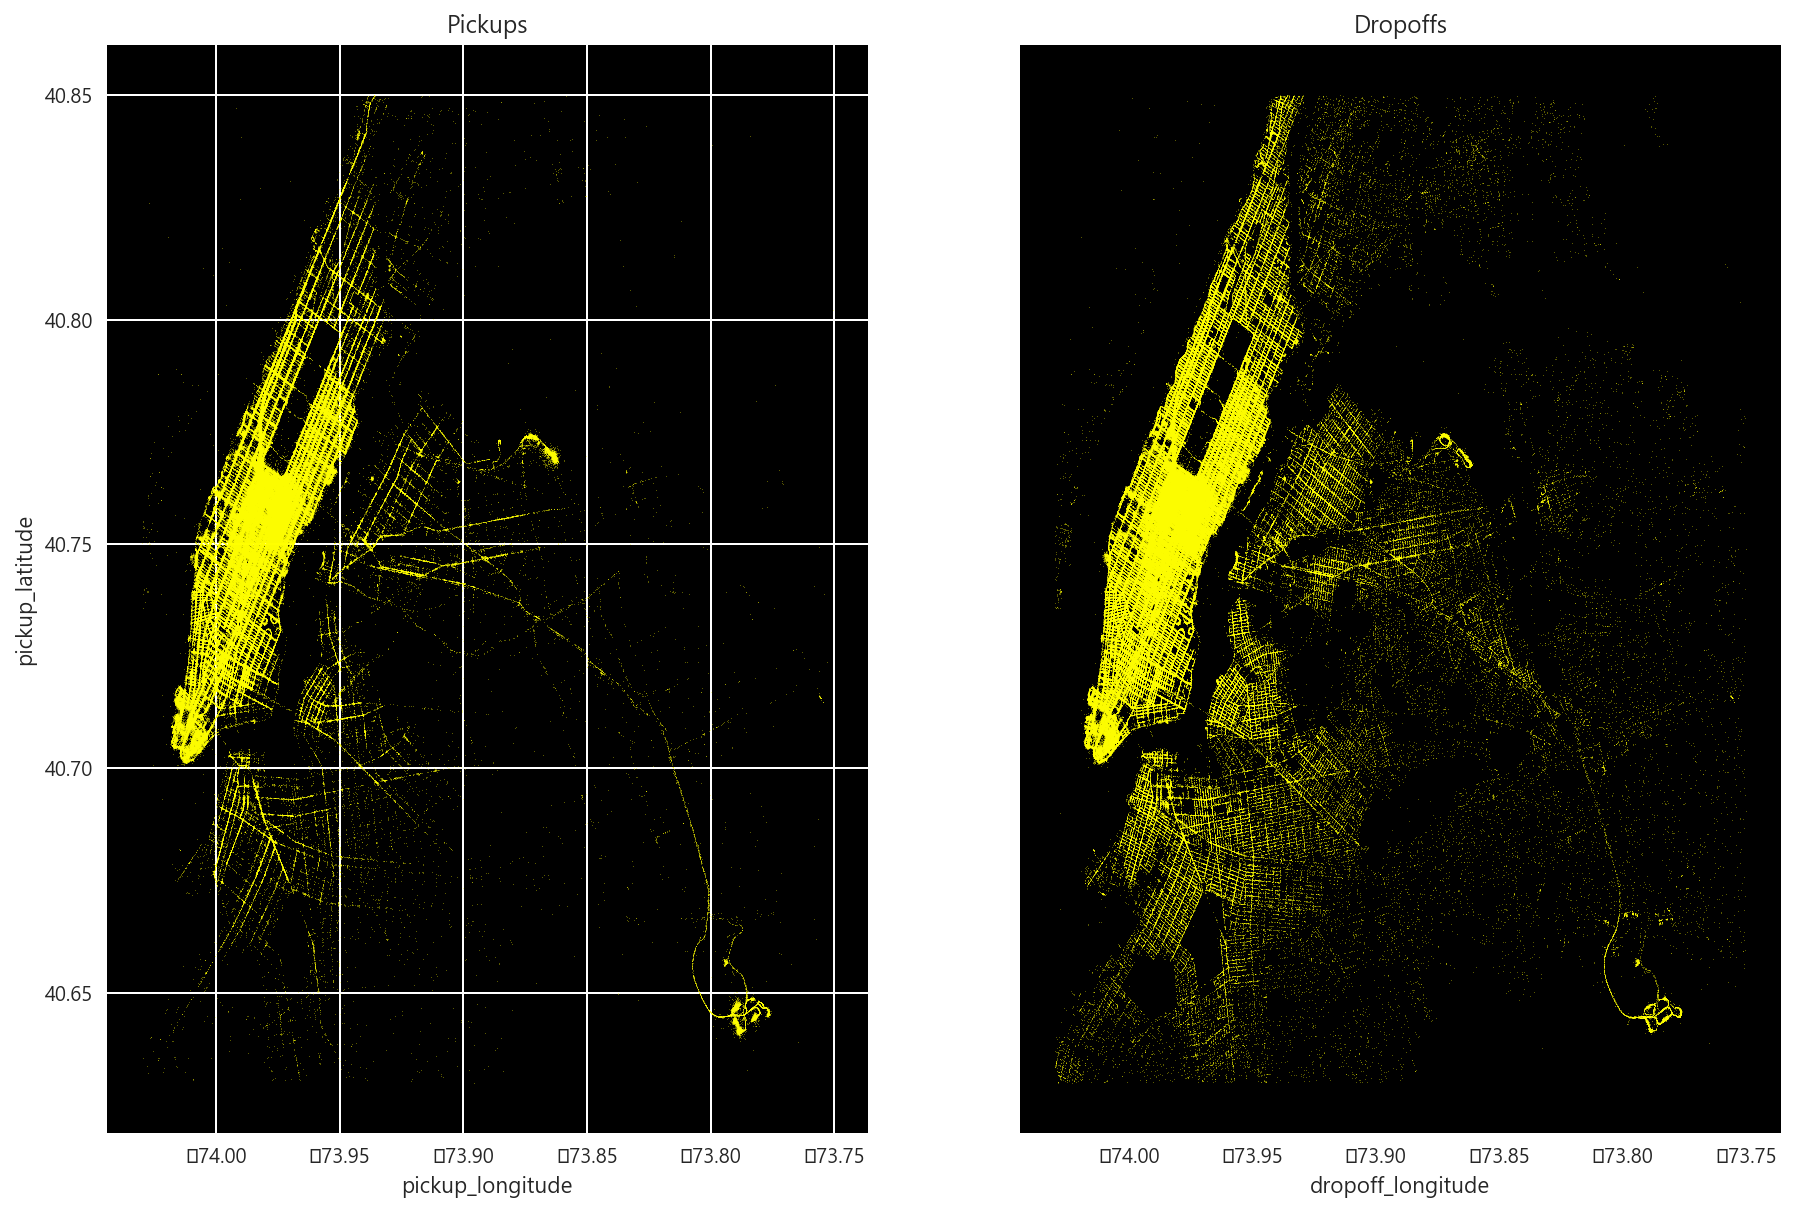

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude",
                color="yellow", 
                s=.02, alpha=.6, subplots=True, ax=ax1)

ax1.set_title("Pickups")
ax1.set_facecolor("black")

taxi.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude",
                color="yellow", grid=False,
                s=.02, alpha=.6, subplots=True, ax=ax2)

ax2.set_title("Dropoffs")
ax2.set_facecolor("black") 

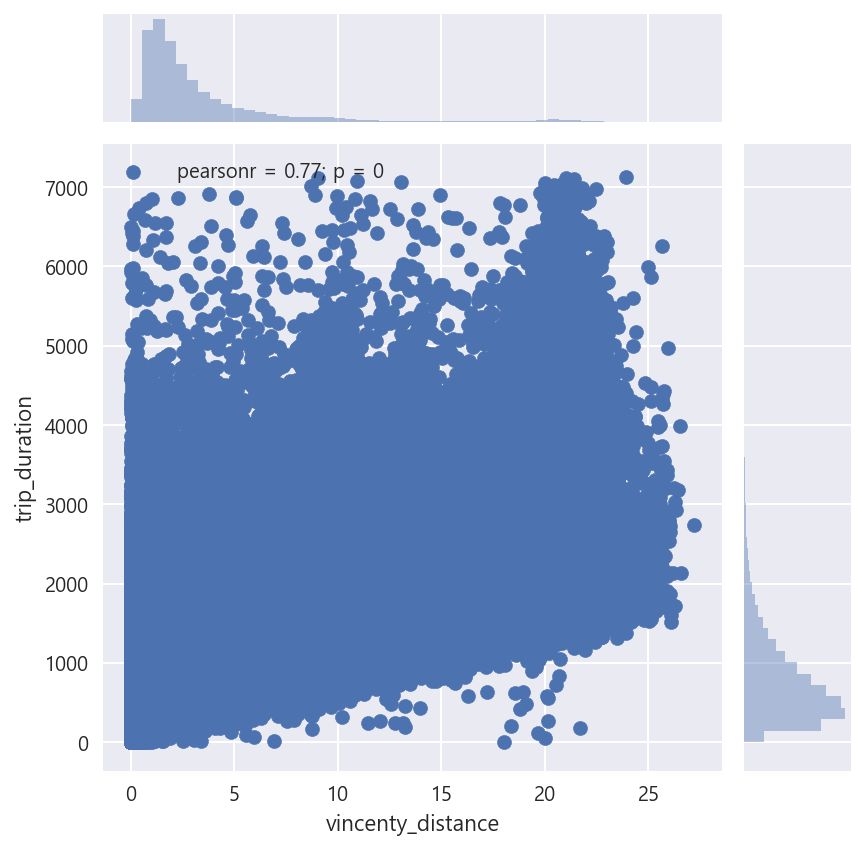

In [54]:
sns.jointplot(x="vincenty_distance", y="trip_duration", data=taxi);

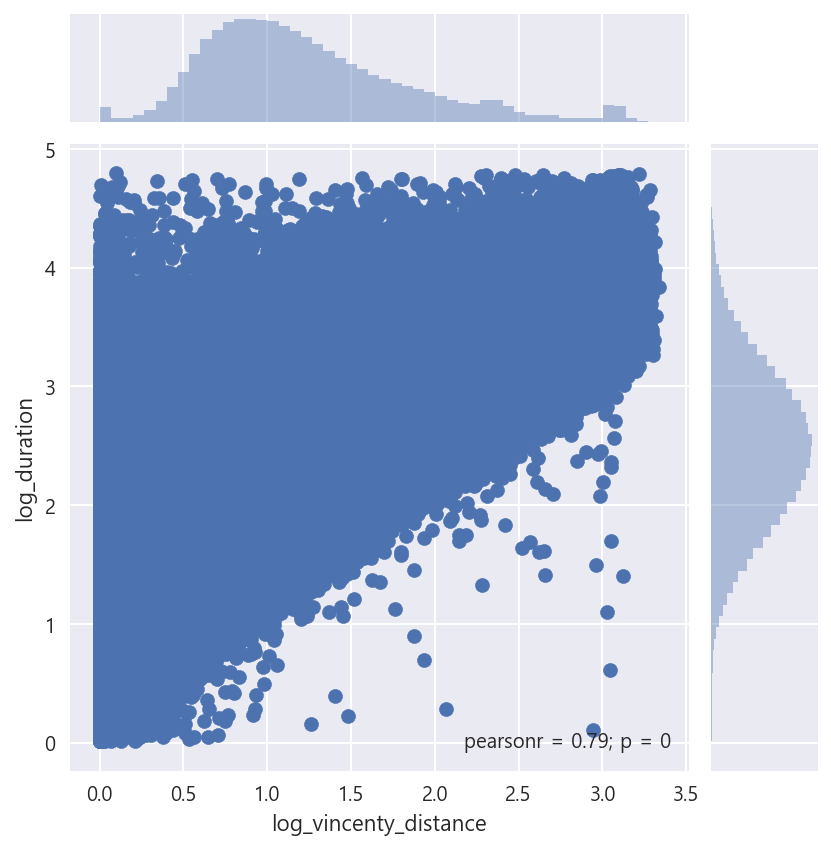

In [55]:
sns.jointplot(x="log_vincenty_distance", y="log_duration", data=taxi);

In [56]:
taxi["pickup_datetime"] = pd.to_datetime(taxi.pickup_datetime)

taxi.loc[:, "pickup_weekday"] = taxi["pickup_datetime"].dt.weekday
taxi.loc[:, "pickup_hour_weekofyear"] = taxi["pickup_datetime"].dt.weekofyear
taxi.loc[:, "pickup_hour"] = taxi["pickup_datetime"].dt.hour
taxi.loc[:, "pickup_minute"] = taxi["pickup_datetime"].dt.minute
taxi.loc[:, "pickup_dt"] = (taxi["pickup_datetime"] - taxi["pickup_datetime"].min()).dt.total_seconds()
taxi.loc[:, "pickup_week_hour"] = taxi["pickup_weekday"] * 24 + taxi["pickup_hour"]

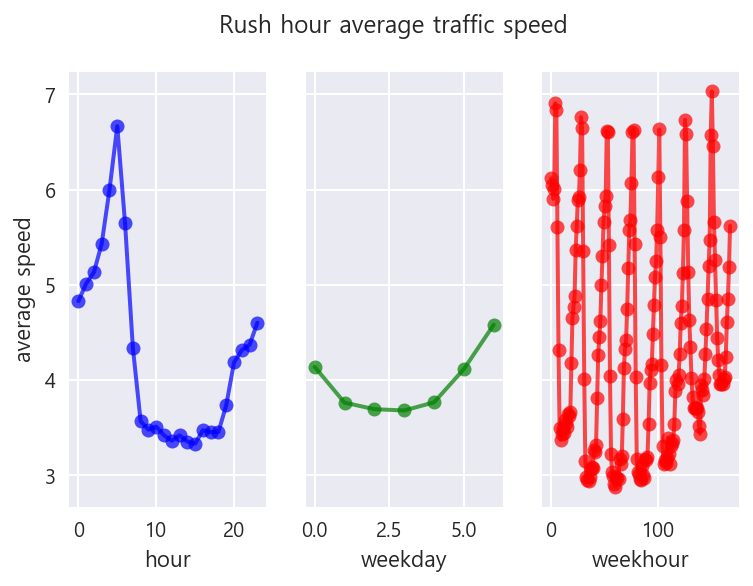

In [57]:
taxi.loc[:, "avg_speed_h"] = 1000 * taxi["vincenty_distance"] / taxi["trip_duration"]
# taxi.loc[:, "avg_speed_m] = 1000 * taxi["distance_dummy_manhattan] / taxi["trip_duration"]

plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(taxi.groupby("pickup_hour").mean()["avg_speed_h"], 'bo-', lw=2, alpha=0.7)
ax[1].plot(taxi.groupby("pickup_weekday").mean()["avg_speed_h"], 'go-', lw=2, alpha=0.7)
ax[2].plot(taxi.groupby("pickup_week_hour").mean()["avg_speed_h"], 'ro-', lw=2, alpha=0.7)

ax[0].set_xlabel("hour")
ax[1].set_xlabel("weekday")
ax[2].set_xlabel("weekhour")

ax[0].set_ylabel("average speed")
fig.suptitle("Rush hour average traffic speed")
plt.show()

In [58]:
# import gmplot
# gmap = gmplot.GoogleMapPlotter(40.766321, -73.965457, 11)

# gmap.plot(pickup_lat[:100], pickup_lng[:100], 'cornflowerblue', edge_width=10)
# gmap.scatter(pickup_lat[:100], pickup_lng[:100], '#3B0B39', size=40, marker=False)
# gmap.scatter(dropoff_lat[:100], dropoff_lng[:100], 'k', marker=True)

# gmap.draw("mymap.html")

In [59]:
# west, south, east, north = -74.03, 40.63, -73.77, 40.85

# train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
# train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
# train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
# train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [60]:
# def manhattan_distance(x,y):
#     return sum(abs(a-b) for a,b in zip(x,y))

# def euclidean_distance(x,y):
#     return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

# taxi['euclidean_distance'] = taxi.apply(lambda row: euclidean_distance(
#     (row['pickup_latitude'], row['pickup_longitude']),
#     (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

# taxi['log_euclidean_distance'] = np.log1p(taxi['euclidean_distance'])

파라미터

- 이동 거리
- 시간대별


- 승/하차 위치 (맨하탄 내부 / 맨하탄 내외부(특히 공항))
- 스피드
- 승객 수

- 가장 큰 영향을 미치는 변수 확인 (아직 안 배움)
- 코드 깔끔히

### 속도와 duration간의 상관관계

In [61]:
taxi_df1.tail()

,passenger_count,trip_duration,count,pickup_datetime,pickup_date,pickup_month,pickup_hour,pickup_weekday
1458639,4,778,1,2016-04-08 13:31:04,2016-04-08,4,13,4
1458640,1,655,1,2016-01-10 07:35:15,2016-01-10,1,7,6
1458641,1,764,1,2016-04-22 06:57:41,2016-04-22,4,6,4
1458642,1,373,1,2016-01-05 15:56:26,2016-01-05,1,15,1
1458643,1,198,1,2016-04-05 14:44:25,2016-04-05,4,14,1


In [67]:
taxi["vincenty_distance"] = vincenty_distance

In [76]:
taxi["avg_speed_km_h"] = taxi["vincenty_distance"] / (taxi["trip_duration"] / 3600)

In [78]:
taxi["avg_speed_km_h"].tail()

1458639     5.678050
1458640    33.231088
1458641    36.855386
1458642    10.544468
1458643    20.611914
Name: avg_speed_km_h, dtype: float64

In [86]:
taxi_hour_sp_du = taxi.loc[:, ["pickup_hour", "avg_speed_km_h", "duration_min"]]
taxi_hour_sp_du = taxi_hour_sp_du.groupby("pickup_hour").mean()
taxi_hour_sp_du.tail()

,avg_speed_km_h,duration_min
pickup_hour,,
19,13.449736,12.999469
20,15.064658,12.597677
21,15.530901,12.686369
22,15.731470,13.156500
23,16.568499,13.239537


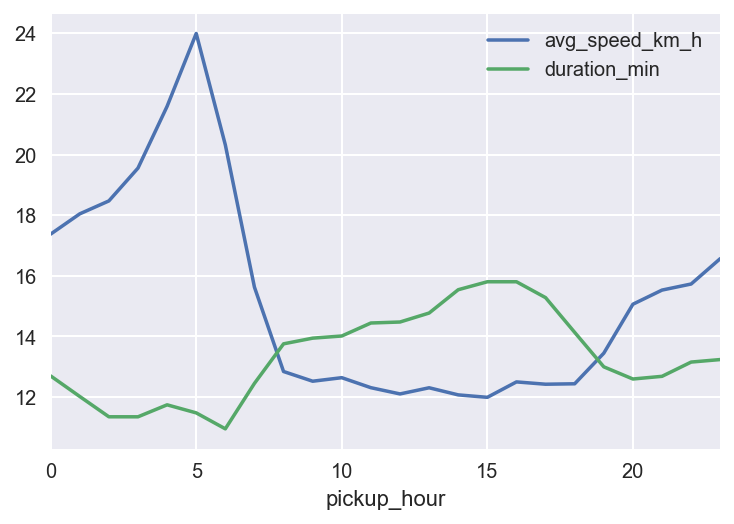

In [87]:
taxi_hour_sp_du.plot()
plt.legend(loc='best')
plt.show()